In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./wine.csv", index_col=0)

print(df.head())

      Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
Wine                                                              
1       14.23        1.71  2.43  15.6  127     2.80        3.06   
1       13.20        1.78  2.14  11.2  100     2.65        2.76   
1       13.16        2.36  2.67  18.6  101     2.80        3.24   
1       14.37        1.95  2.50  16.8  113     3.85        3.49   
1       13.24        2.59  2.87  21.0  118     2.80        2.69   

      Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
Wine                                                                 
1                     0.28     2.29       5.64  1.04  3.92     1065  
1                     0.26     1.28       4.38  1.05  3.40     1050  
1                     0.30     2.81       5.68  1.03  3.17     1185  
1                     0.24     2.18       7.80  0.86  3.45     1480  
1                     0.39     1.82       4.32  1.04  2.93      735  


In [4]:
print(df.columns)

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')


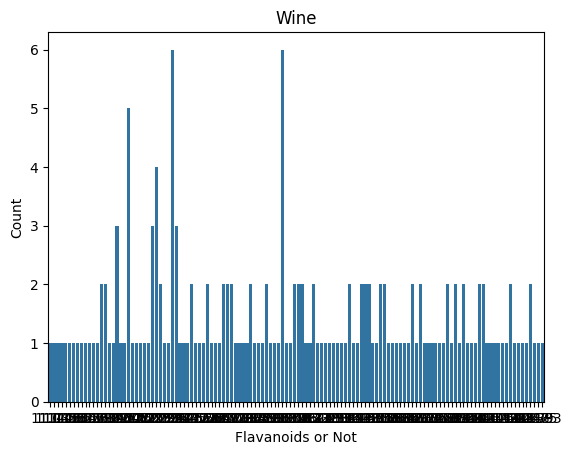

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Alcohol")
plt.xlabel("Flavanoids or Not")
plt.ylabel("Count")
plt.title('Wine')
plt.show()

In [6]:
# 레이블 갯수 확인 (숫자)
df['Alcohol'].value_counts()

Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

<Axes: xlabel='Mg', ylabel='Count'>

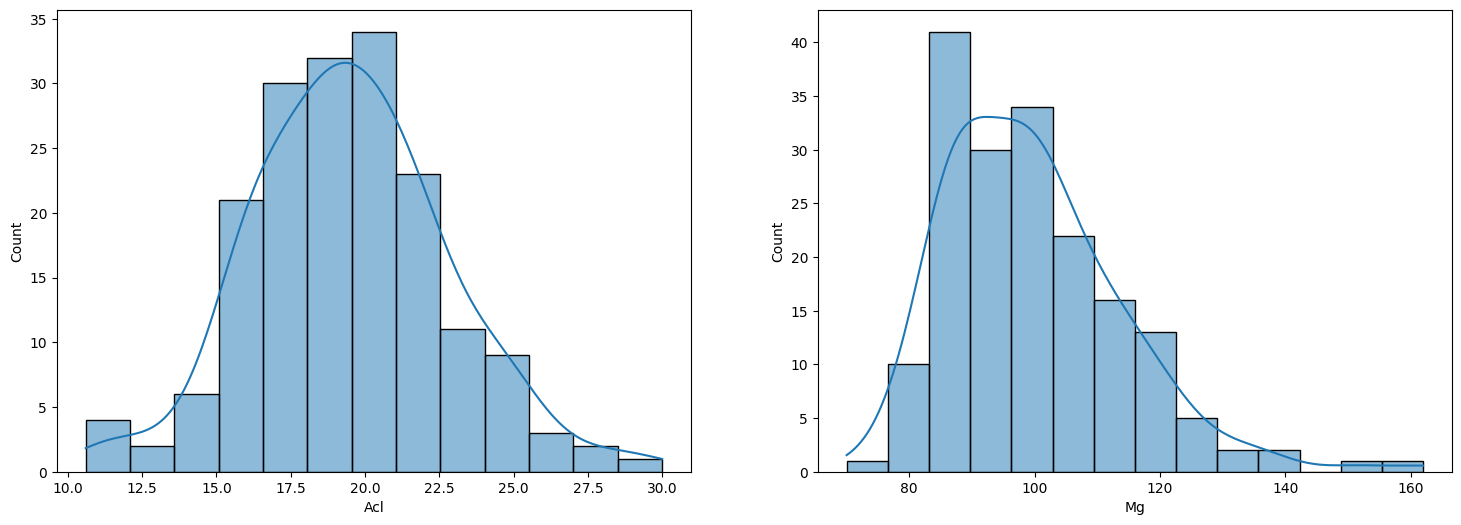

In [8]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.histplot(df['Acl'], kde=True, ax=ax1)

ax2 = plt.subplot(1,2,2)
sns.histplot(df['Mg'], kde=True, ax=ax2)

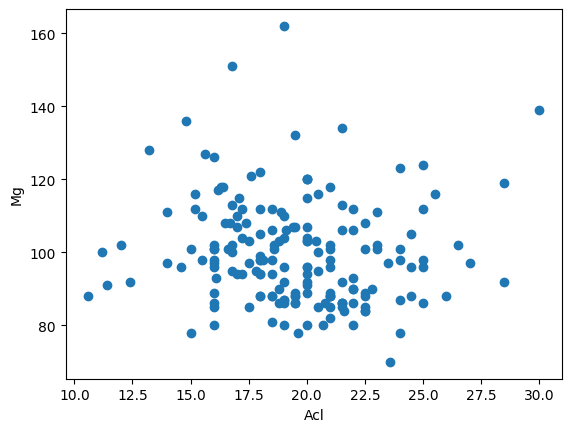

In [9]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Acl'], df['Mg'])
plt.xlabel('Acl')
plt.ylabel('Mg')

plt.show()